In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'C:\Users\HP\Downloads\ai_financial_market_daily_realistic_synthetic.csv', encoding='utf-8')

In [4]:
data.shape

(10959, 7)

In [7]:
#fill values
data['Event'] = data['Event'].fillna(0)
data.isnull().sum()

Date                   0
Company                0
R&D_Spending_USD_Mn    0
AI_Revenue_USD_Mn      0
AI_Revenue_Growth_%    0
Event                  0
Stock_Impact_%         0
dtype: int64

In [18]:
data['Date']= pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 10959 non-null  datetime64[ns]
 1   Company              10959 non-null  object        
 2   R&D_Spending_USD_Mn  10959 non-null  float64       
 3   AI_Revenue_USD_Mn    10959 non-null  float64       
 4   AI_Revenue_Growth_%  10959 non-null  float64       
 5   Event                10959 non-null  object        
 6   Stock_Impact_%       10959 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 599.4+ KB


In [20]:
data.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,0,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,0,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,0,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,0,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,0,-0.09


In [21]:
#Companies
data['Company'].unique()

array(['OpenAI', 'Google', 'Meta'], dtype=object)

In [28]:
# Spendings of companies on R&D?
a = data.groupby('Company')['R&D_Spending_USD_Mn'].sum()/1000
a

Company
Google    423.34114
Meta      264.53307
OpenAI     26.48277
Name: R&D_Spending_USD_Mn, dtype: float64

In [40]:
# Revenue earned by companies?
s = data.groupby('Company')['AI_Revenue_USD_Mn'].sum()/1000
s

Company
Google    284.49838
Meta      189.62182
OpenAI      9.46289
Name: AI_Revenue_USD_Mn, dtype: float64

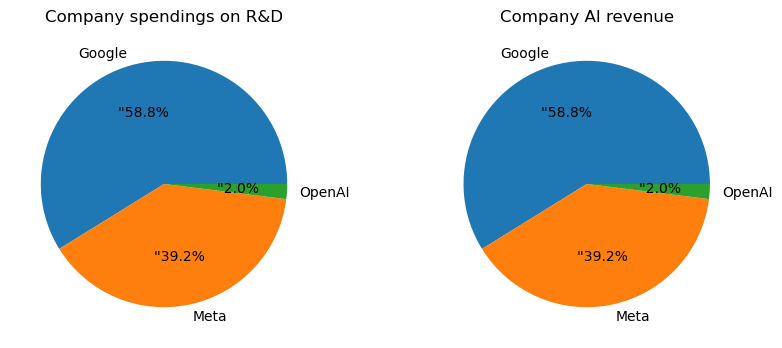

In [48]:
plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
plt.pie(a, labels = a.index, autopct ="''%1.1f%%")
plt.title('Company spendings on R&D')

plt.subplot(1,2,2)
plt.pie(s, labels = s.index, autopct ="''%1.1f%%")
plt.title('Company AI revenue')
plt.show()

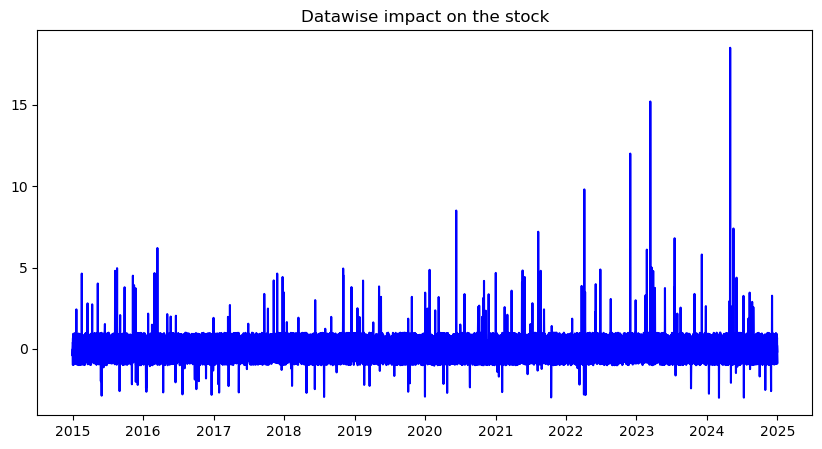

In [57]:
# Datawise impact on the stock?
plt.figure(figsize= (10,5))
plt.plot(data['Date'], data['Stock_Impact_%'], color='b')
plt.title('Datawise impact on the stock')
plt.show()

In [60]:
ai = data[data['Company'] == 'OpenAI']

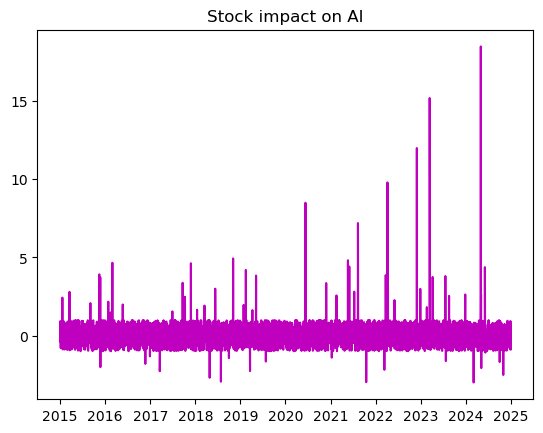

In [66]:
plt.plot(ai['Date'], ai['Stock_Impact_%'], color = 'm')
plt.title('Stock impact on AI')
plt.show()

In [61]:
g = data[data['Company'] == 'Google']

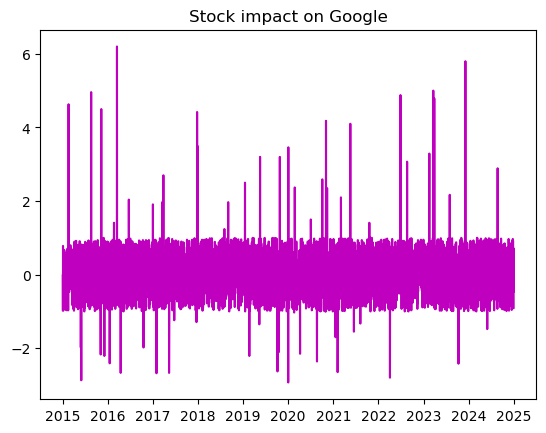

In [67]:
plt.plot(g['Date'], g['Stock_Impact_%'], color = 'm')
plt.title('Stock impact on Google')
plt.show()

In [62]:
m = data[data['Company'] == 'Meta']

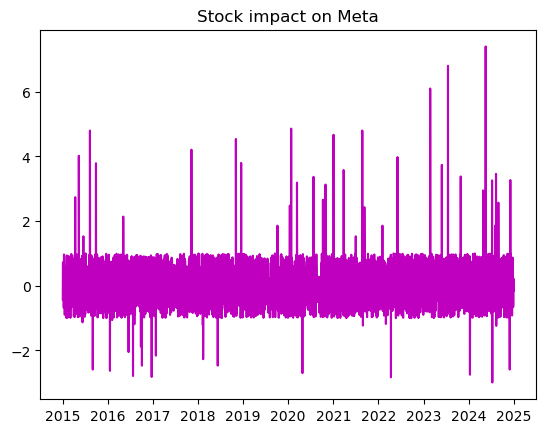

In [68]:
plt.plot(m['Date'], m['Stock_Impact_%'], color = 'm')
plt.title('Stock impact on Meta')
plt.show()

In [73]:
# Events when maximum stock impact was observed?=
ai.sort_values(by = 'Stock_Impact_%', ascending = False).head(5)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3408,2024-05-01,OpenAI,10.91,5.34,434.27,GPT-5 release (predicted),18.5,2024
2994,2023-03-14,OpenAI,7.78,4.05,304.57,GPT-4 release,15.2,2023
2890,2022-11-30,OpenAI,10.60,3.18,217.72,ChatGPT (GPT-3.5) launch,12.0,2022
2652,2022-04-06,OpenAI,9.24,3.48,247.93,DALL·E 2 release,9.8,2022
1988,2020-06-11,OpenAI,5.90,2.62,161.56,GPT-3 release,8.5,2020


In [72]:
g.sort_values(by = 'Stock_Impact_%', ascending = False).head(5)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
4092,2016-03-15,Google,84.56,36.22,20.73,AlphaGo beats Lee Sedol,6.20,2016
6914,2023-12-06,Google,146.59,129.17,330.55,Gemini AI release,5.80,2023
6654,2023-03-21,Google,149.34,129.76,332.53,Bard chatbot launch,5.00,2023
3883,2015-08-19,Google,79.27,30.89,2.98,AI partnership deal,4.96,2015
6388,2022-06-28,Google,137.71,107.96,259.85,AI ethics policy update,4.88,2022


In [74]:
m.sort_values(by = 'Stock_Impact_%', ascending = False).head(5)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
10731,2024-05-18,Meta,103.64,103.05,415.23,LLaMA 3 release (predicted),7.40,2024
10426,2023-07-18,Meta,92.44,85.67,328.37,LLaMA 2 release,6.80,2023
10282,2023-02-24,Meta,93.71,86.98,334.89,LLaMA 1 release,6.10,2023
9156,2020-01-25,Meta,72.73,49.10,145.49,Cloud AI launch,4.86,2020
9732,2021-08-23,Meta,78.19,59.36,196.79,Cloud AI launch,4.80,2021


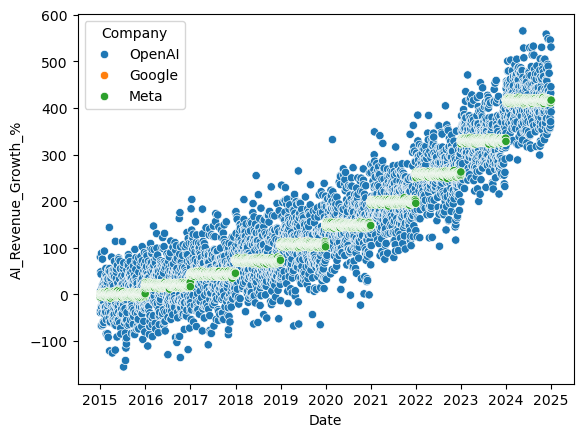

In [78]:
# AI revenus growth on companies?
sns.scatterplot(x = 'Date', y = 'AI_Revenue_Growth_%', data = data, hue = 'Company')
plt.show()

In [79]:
data.sort_values(by= ['AI_Revenue_Growth_%'])

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
189,2015-07-09,OpenAI,5.66,-0.55,-155.43,0,0.70,2015
205,2015-07-25,OpenAI,5.23,-0.42,-141.61,0,-0.62,2015
649,2016-10-11,OpenAI,5.37,-0.35,-135.31,0,0.12,2016
548,2016-07-02,OpenAI,5.19,-0.29,-129.11,0,-0.31,2016
98,2015-04-09,OpenAI,4.80,-0.25,-125.50,0,-0.56,2015
...,...,...,...,...,...,...,...,...
3508,2024-08-09,OpenAI,9.92,6.33,532.86,0,0.77,2024
3645,2024-12-24,OpenAI,8.79,6.46,546.07,0,0.45,2024
3627,2024-12-06,OpenAI,8.51,6.49,548.83,0,-0.15,2024
3612,2024-11-21,OpenAI,10.16,6.59,558.70,0,0.63,2024


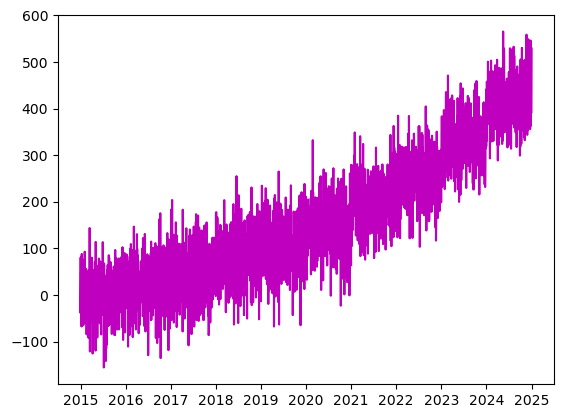

In [83]:
#Open AI revenue year by year
plt.plot(ai['Date'], ai['AI_Revenue_Growth_%'], color = 'm')
plt.show()

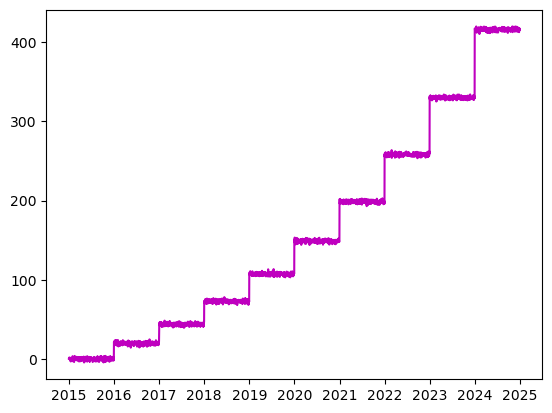

In [84]:
#Google revenue year by year
plt.plot(g['Date'], g['AI_Revenue_Growth_%'], color = 'm')
plt.show()

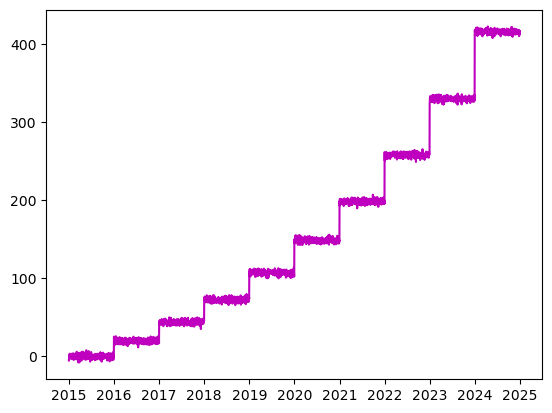

In [85]:
#Meta revenue year by year
plt.plot(m['Date'], m['AI_Revenue_Growth_%'], color = 'm')
plt.show()

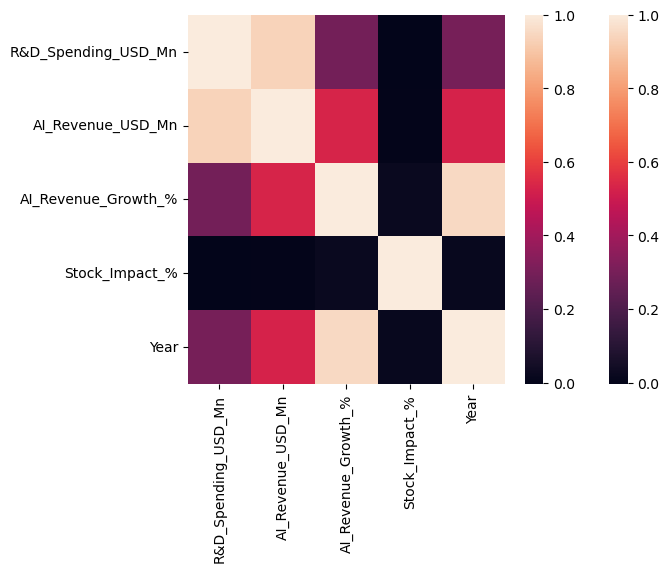

In [87]:
# Corelation between columns?
sns.heatmap(data.corr(numeric_only = True))
plt.show()

In [92]:
# Expenditure vs revenue yearly?
spent = data.groupby('Year')['R&D_Spending_USD_Mn'].sum()
spent

Year
2015    49304.23
2016    53349.94
2017    57475.12
2018    62002.16
2019    67071.51
2020    72602.53
2021    78207.32
2022    84390.17
2023    91193.92
2024    98760.08
Name: R&D_Spending_USD_Mn, dtype: float64

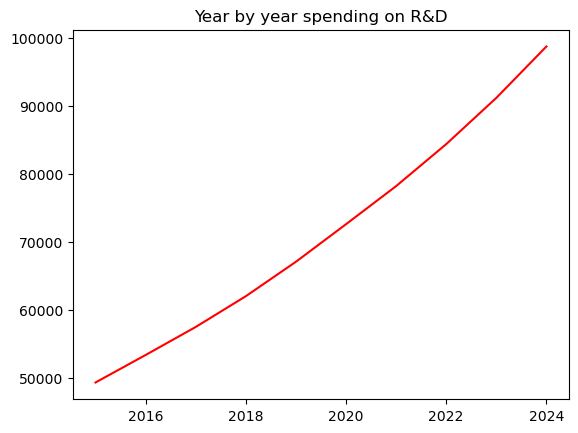

In [94]:
plt.plot(spent.index, spent.values, color = 'r')
plt.title('Year by year spending on R&D')
plt.show()

In [96]:
rev = data.groupby('Year')['AI_Revenue_USD_Mn'].sum()
rev

Year
2015    18623.21
2016    22361.20
2017    26776.80
2018    32164.44
2019    38580.32
2020    46456.19
2021    55591.14
2022    66674.24
2023    80041.64
2024    96313.91
Name: AI_Revenue_USD_Mn, dtype: float64

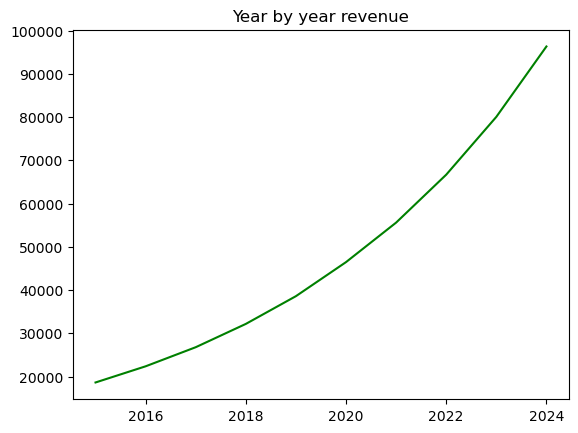

In [98]:
plt.plot(rev.index, rev.values, color = 'g')
plt.title('Year by year revenue')
plt.show()

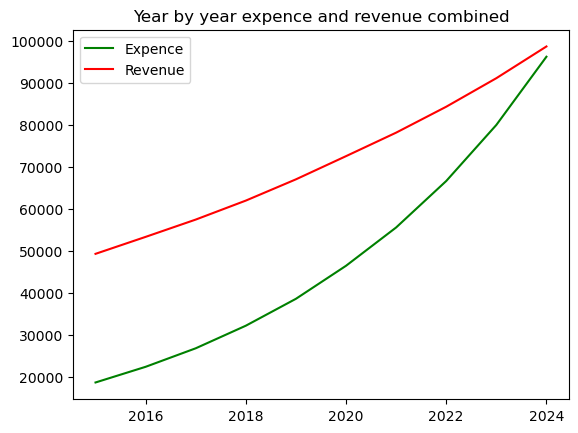

In [101]:
plt.plot(rev.index, rev.values, color = 'g')
plt.plot(spent.index, spent.values, color = 'r')
plt.title('Year by year expence and revenue combined')
plt.legend(['Expence', 'Revenue'])
plt.show()

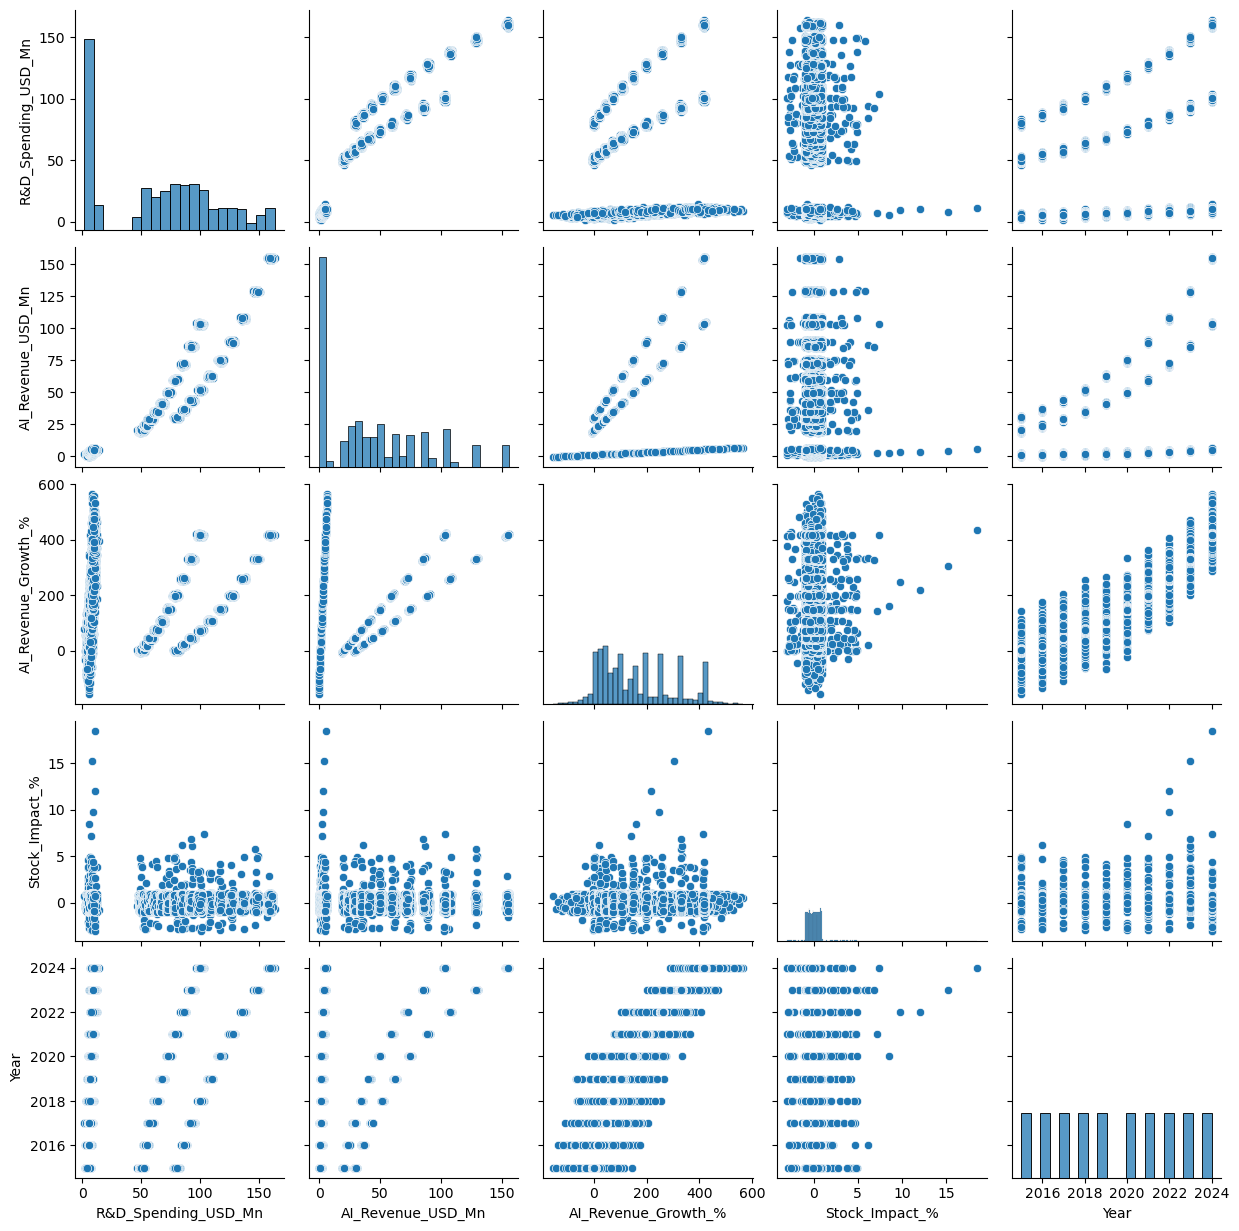

In [102]:
sns.pairplot(data);
plt.show()

In [104]:
# Event impact analysis?
data.Event.value_counts()

Event
0                                  10726
AI speech recognition release         37
AI-powered search update              32
AI Ads Optimization upgrade           32
AI partnership deal                   32
AI Video Recommendation upgrade       29
AI ethics policy update               27
Cloud AI launch                       27
TensorFlow open-source release         1
LLaMA 2 release                        1
LLaMA 1 release                        1
Gemini AI release                      1
Bard chatbot launch                    1
MUM Search Model launch                1
BERT for Search launch                 1
AlphaGo beats Lee Sedol                1
DALL·E 2 release                       1
GPT-5 release (predicted)              1
GPT-4 release                          1
ChatGPT (GPT-3.5) launch               1
Codex release                          1
GPT-3 release                          1
GPT-2 release                          1
GPT-1 release                          1
LLaMA 3 re

In [105]:
data[data.Event == 'Cloud AI launch']

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
19,2015-01-20,OpenAI,4.37,0.91,-9.27,Cloud AI launch,2.43,2015
326,2015-11-23,OpenAI,4.48,1.23,22.71,Cloud AI launch,3.73,2015
411,2016-02-16,OpenAI,4.97,1.04,4.41,Cloud AI launch,1.49,2016
691,2016-11-22,OpenAI,6.44,0.55,-44.62,Cloud AI launch,-1.81,2016
808,2017-03-19,OpenAI,5.64,1.39,38.95,Cloud AI launch,-2.28,2017
1360,2018-09-22,OpenAI,5.92,2.00,100.08,Cloud AI launch,-0.73,2018
1402,2018-11-03,OpenAI,6.72,1.65,65.10,Cloud AI launch,4.94,2018
1539,2019-03-20,OpenAI,5.38,2.53,152.59,Cloud AI launch,-2.27,2019
1667,2019-07-26,OpenAI,5.72,2.27,126.99,Cloud AI launch,-1.66,2019
2995,2023-03-15,OpenAI,12.31,4.44,344.17,Cloud AI launch,3.84,2023


In [107]:
tf = data.loc[ 10803 : 10813]
tf

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
10803,2024-07-29,Meta,99.19,102.09,410.45,0,-0.29,2024
10804,2024-07-30,Meta,100.28,102.85,414.26,0,-0.76,2024
10805,2024-07-31,Meta,98.79,103.46,417.32,0,-0.65,2024
10806,2024-08-01,Meta,99.85,102.74,413.69,0,-0.59,2024
10807,2024-08-02,Meta,100.37,103.34,416.70,0,-0.10,2024
10808,2024-08-03,Meta,100.86,103.06,415.30,Cloud AI launch,1.86,2024
10809,2024-08-04,Meta,100.04,102.69,413.45,0,0.12,2024
10810,2024-08-05,Meta,99.99,103.77,418.83,0,0.74,2024
10811,2024-08-06,Meta,98.50,102.94,414.69,0,-0.40,2024
10812,2024-08-07,Meta,101.12,103.49,417.46,0,0.70,2024


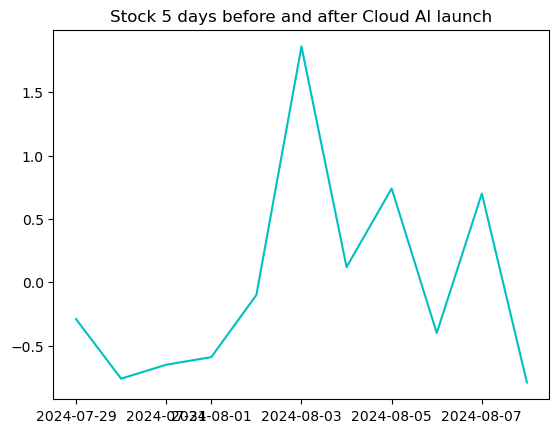

In [110]:
plt.plot(tf['Date'], tf['Stock_Impact_%'], color = 'c')
plt.title('Stock 5 days before and after Cloud AI launch')
plt.show()

In [111]:
#Average impact on stock of companies
data.groupby('Company')['Stock_Impact_%'].mean()*100

Company
Google    2.620860
Meta      0.976184
OpenAI    4.070901
Name: Stock_Impact_%, dtype: float64

In [115]:
# Average expence on R&D 
data.groupby('Company')['R&D_Spending_USD_Mn'].mean()

Company
Google    115.888623
Meta       72.415294
OpenAI      7.249595
Name: R&D_Spending_USD_Mn, dtype: float64

In [114]:
# max impact on company stock
data.groupby('Company')['Stock_Impact_%'].max()

Company
Google     6.2
Meta       7.4
OpenAI    18.5
Name: Stock_Impact_%, dtype: float64

In [118]:
# Change in index wrt year & company?`
stock =data.groupby(['Year', 'Company'])['Stock_Impact_%'].max()
stock

Year  Company
2015  Google      4.96
      Meta        4.80
      OpenAI      3.92
2016  Google      6.20
      Meta        2.14
      OpenAI      4.66
2017  Google      4.42
      Meta        4.21
      OpenAI      4.63
2018  Google      1.97
      Meta        4.54
      OpenAI      4.94
2019  Google      3.20
      Meta        1.86
      OpenAI      4.20
2020  Google      4.18
      Meta        4.86
      OpenAI      8.50
2021  Google      4.10
      Meta        4.80
      OpenAI      7.20
2022  Google      4.88
      Meta        3.98
      OpenAI     12.00
2023  Google      5.80
      Meta        6.80
      OpenAI     15.20
2024  Google      2.89
      Meta        7.40
      OpenAI     18.50
Name: Stock_Impact_%, dtype: float64

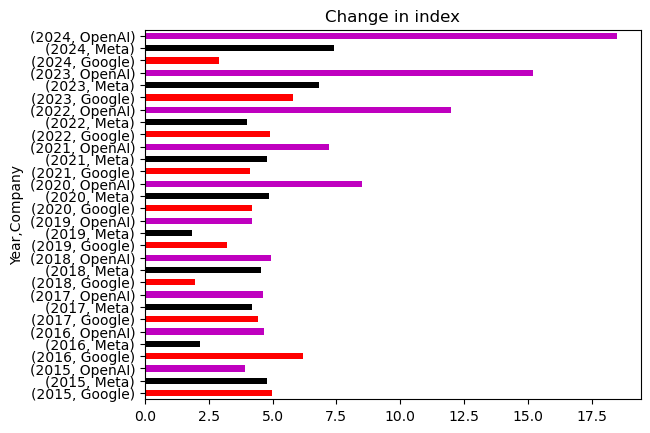

In [120]:
stock.plot(kind = 'barh', color= ['r', 'black', 'm'])
plt.title('Change in index')
plt.show()